In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

from prophet.plot import plot_plotly

## ***Applying Linear Growth***

In [2]:
df = pd.read_csv('../data/divvy_daily.csv')
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [3]:
model = Prophet(growth='linear',
                seasonality_mode='multiplicative',
                yearly_seasonality=4)

In [4]:
model.fit(df)

10:34:46 - cmdstanpy - INFO - Chain [1] start processing
10:34:46 - cmdstanpy - INFO - Chain [1] done processing


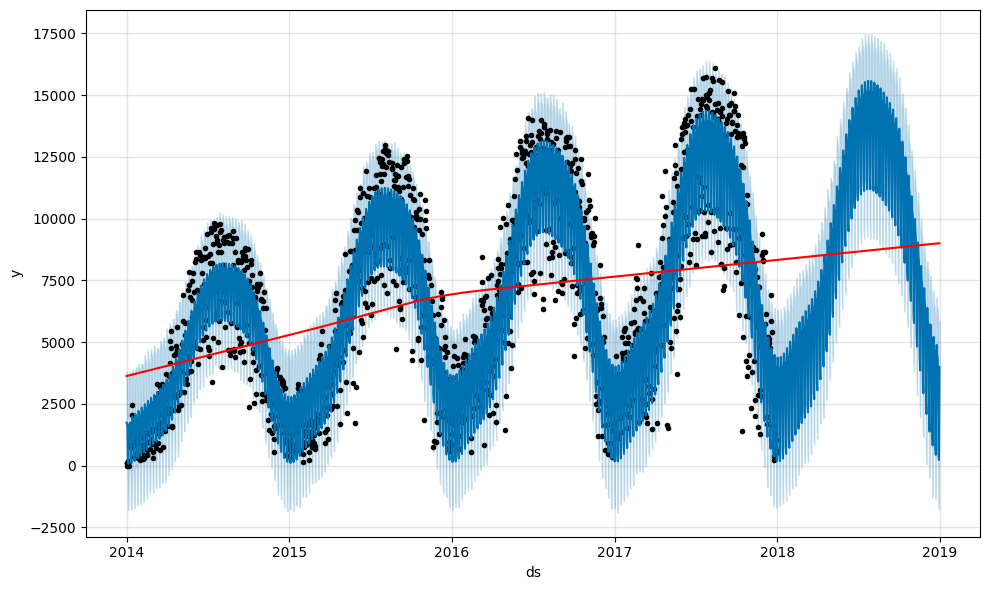

In [5]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
# fig = plot_plotly(model, forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

## ***Saturating forecasts***

In [6]:
import numpy as np
import random
random.seed(42)  # set random seed for repeatability

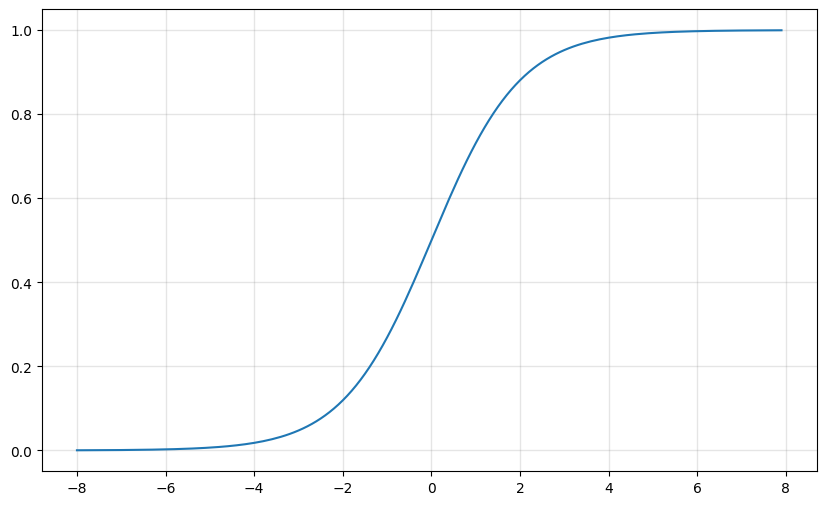

In [7]:
x = np.arange(-8, 8, .1)
y = [1 / (1 + np.e**(-val)) for val in x]

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
plt.show()

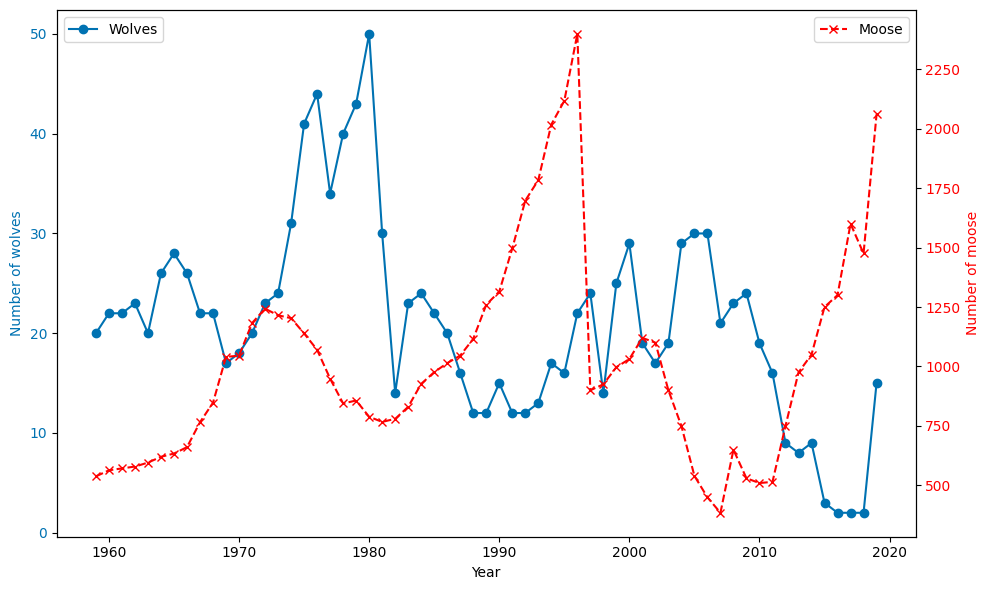

In [8]:
ir = pd.read_excel('../data/Data_wolves_moose_Isle_Royale_June2019.xlsx',
                     sheet_name='1. population level data',
                     header=1)

fig, ax1 = plt.subplots(figsize=(10, 6))
color = '#0072B2'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of wolves', color=color)
ax1.plot(ir['year'], ir['wolves'], color=color, ls='-', marker='o', label='Wolves')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'r'
ax2.set_ylabel('Number of moose', color=color)  # we already handled the x-label with ax1
ax2.plot(ir['year'], ir['moose'], color=color, ls='--', marker='x', label='Moose')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## ***Increasing logistic growth***

In [9]:
x = pd.to_datetime(pd.date_range('1995-01', '2004-02', freq='M').strftime("%Y-%b").tolist())

/tmp/ipykernel_6191/192792339.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x = pd.to_datetime(pd.date_range('1995-01', '2004-02', freq='M').strftime("%Y-%b").tolist())


In [10]:
x

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2003-04-01', '2003-05-01', '2003-06-01', '2003-07-01',
               '2003-08-01', '2003-09-01', '2003-10-01', '2003-11-01',
               '2003-12-01', '2004-01-01'],
              dtype='datetime64[ns]', length=109, freq=None)

In [11]:
len(x)

109

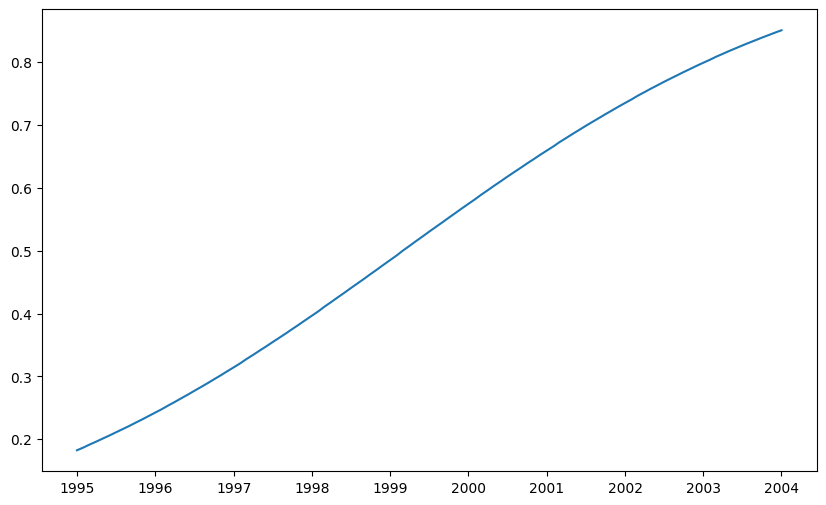

In [12]:
y = [1 / (1 + np.e ** (-.03 * (val - 50))) for val in range(len(x))]  # create logistic curve

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()

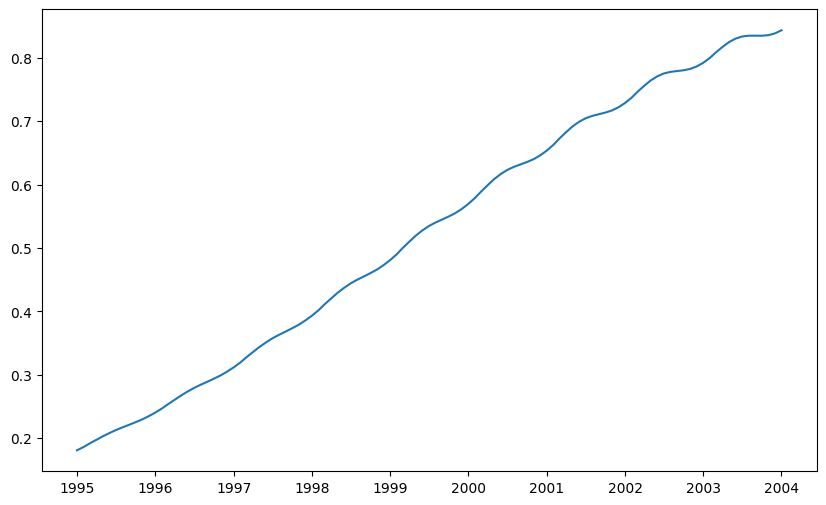

In [13]:
y = [y[idx] + y[idx] * .01 * np.sin((idx - 2) * (360 / 12) * (np.pi / 180)) for idx in range(len(y))]  # add sinusoidal variation

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()

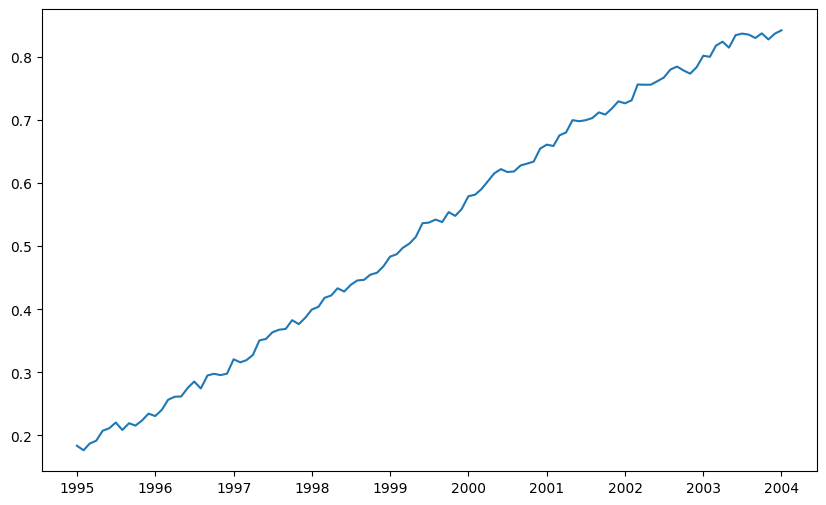

In [14]:
y = [val + random.uniform(-.01, .01) for val in y]  # add noise

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()

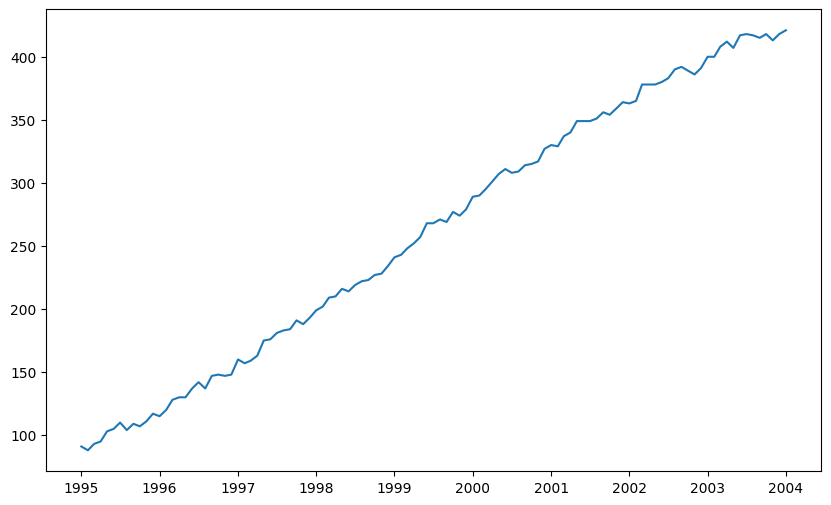

In [15]:
y = [int(500 * val) for val in y]  # scale up

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()

### *Modeling with linear growth*

In [16]:
df = pd.DataFrame({'ds': pd.to_datetime(x), 'y': y})

In [17]:
df

,ds,y
0,1995-01-01,91
1,1995-02-01,88
2,1995-03-01,93
3,1995-04-01,95
4,1995-05-01,103
...,...,...
104,2003-09-01,415
105,2003-10-01,418
106,2003-11-01,413
107,2003-12-01,418


10:34:51 - cmdstanpy - INFO - Chain [1] start processing
10:34:51 - cmdstanpy - INFO - Chain [1] done processing


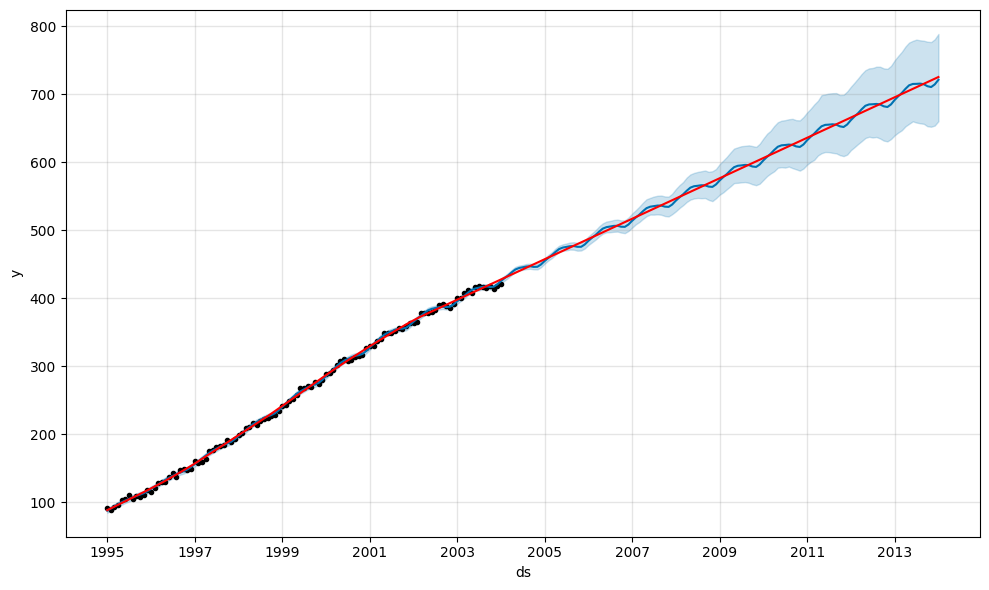

In [18]:
model = Prophet(growth='linear',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=12 * 10, freq='M')
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

## Wrong with linear model
## Diverge toward infinity

### *Modeling with logistic growth*

In [19]:
df['cap'] = 500

In [20]:
model = Prophet(growth='logistic',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=12 * 10, freq='M')

10:34:51 - cmdstanpy - INFO - Chain [1] start processing
10:34:51 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
future['cap'] = 500

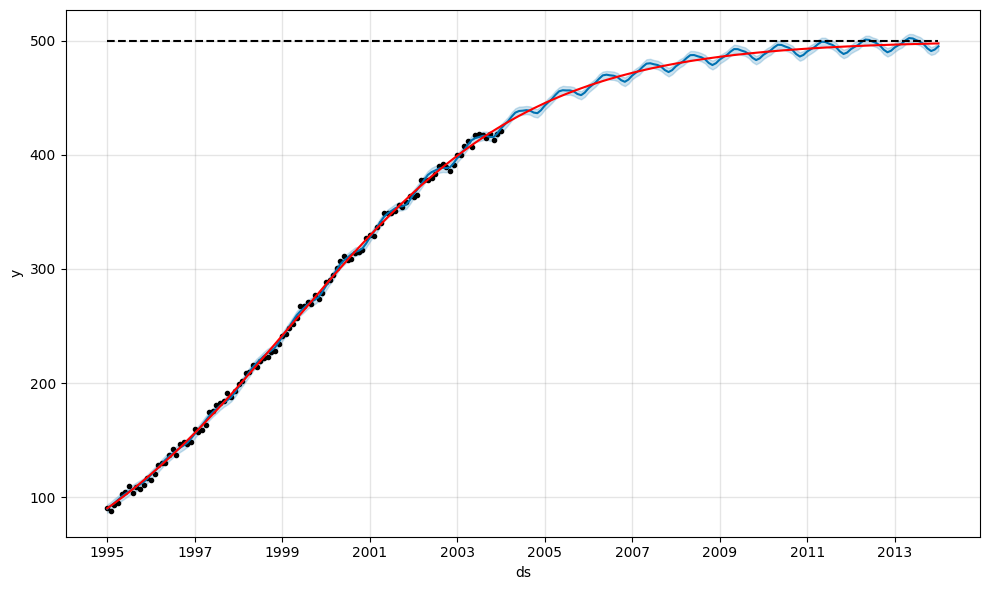

In [22]:
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

### *Non-constant cap - Increasing cap* 

In [23]:
df

,ds,y,cap
0,1995-01-01,91,500
1,1995-02-01,88,500
2,1995-03-01,93,500
3,1995-04-01,95,500
4,1995-05-01,103,500
...,...,...,...
104,2003-09-01,415,500
105,2003-10-01,418,500
106,2003-11-01,413,500
107,2003-12-01,418,500


In [30]:
df[df['ds'].dt.year == 1998]

,ds,y,cap
36,1998-01-01,199,500
37,1998-02-01,202,500
38,1998-03-01,209,500
39,1998-04-01,210,500
40,1998-05-01,216,500
41,1998-06-01,214,500
42,1998-07-01,219,500
43,1998-08-01,222,500
44,1998-09-01,223,500
45,1998-10-01,227,500


In [24]:
df[df['ds'].dt.year == 1998].index[0]

36

In [31]:
# For dates prior to 2007, we will keep the park's saturation limit of 500. 
# For all dates starting in 2007, though, we will increase the cap by two per month

def set_cap(row, df):
    if row.year < 2007:
        return 500
    else:
        pop_2007 = 500
        idx_2007 = df[df['ds'].dt.year == 2007].index[0]
        idx_date = df[df['ds'] == row].index[0]
        return pop_2007 + 2 * (idx_date - idx_2007)

In [32]:
df['cap'] = df['ds'].apply(set_cap, args=(df,))

In [33]:
## Before 2007 , max 500
df['cap'].max()

500

In [34]:
model = Prophet(growth='logistic',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
model.fit(df)

10:45:45 - cmdstanpy - INFO - Chain [1] start processing
10:45:46 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
future = model.make_future_dataframe(periods=12 * 10, freq='M')
#################################################################
future['cap'] = future['ds'].apply(set_cap, args=(future,))
#################################################################

In [37]:
future['cap'].describe()
# min 500 , max 666

count    229.000000
mean     530.445415
std       49.733966
min      500.000000
25%      500.000000
50%      500.000000
75%      552.000000
max      666.000000
Name: cap, dtype: float64

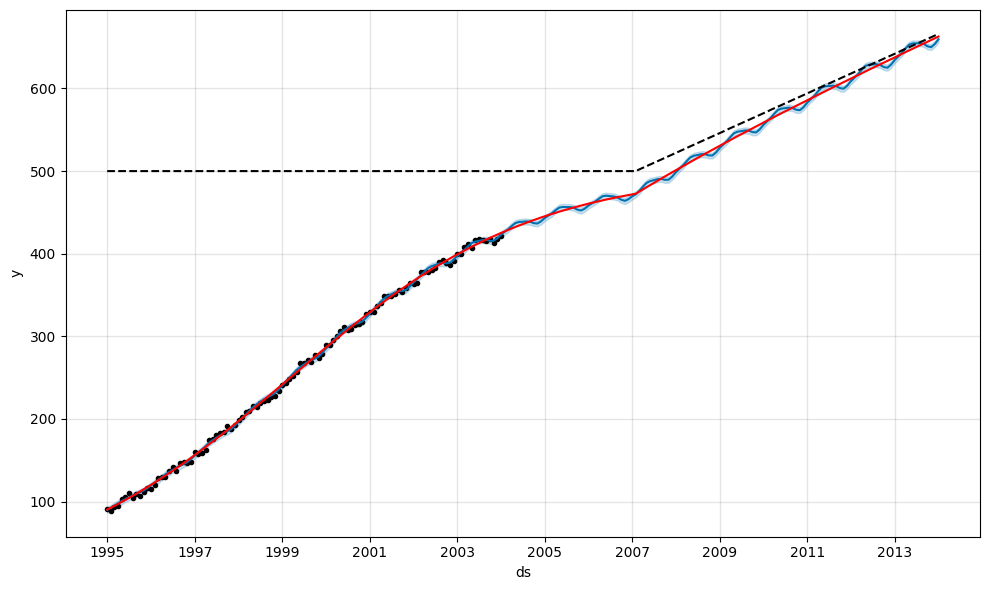

In [38]:
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

## *Decreasing logistic growth*

/tmp/ipykernel_6191/2326559587.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x = pd.to_datetime(pd.date_range('1995-01','2035-02', freq='M').strftime("%Y-%b").tolist())


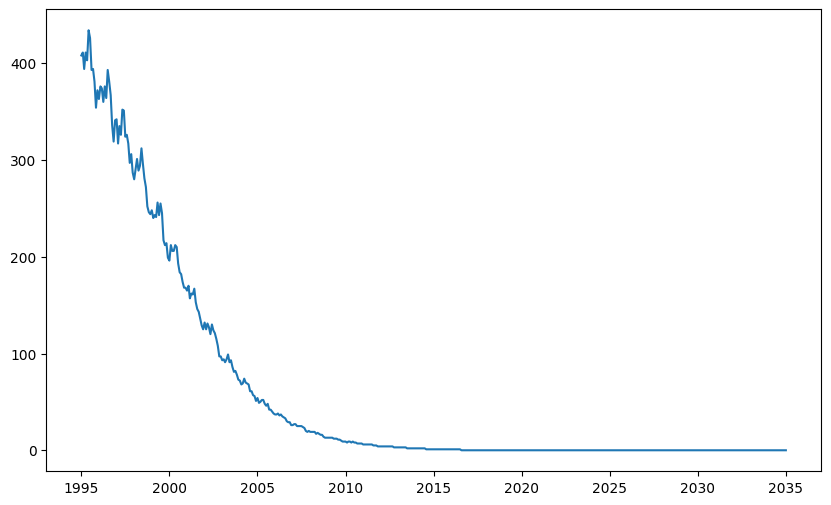

In [46]:
# Simulated declining wolf population in Yellowstone

x = pd.to_datetime(pd.date_range('1995-01','2035-02', freq='M').strftime("%Y-%b").tolist())

## Decresing logistic curve
y = [1 - 1 / (1 + np.e ** (-.03 * (val - 50))) for val in range(len(x))]  # create logistic curve
## add variation
y = [y[idx] + y[idx] * .05 * np.sin((idx - 2) * (360 / 12) * (np.pi / 180)) for idx in range(len(y))]  # add sinusoidal variation

y = [val + 5 * val * random.uniform(-.01, .01) for val in y]  # add noise
y = [int(500 * val) for val in y]  # scale up

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()

In [47]:
# cut off the data at 2006 and attempt to predict when there will be no more wolves in the population

df2 = pd.DataFrame({'ds': pd.to_datetime(x), 'y': y})

## cuf off at 2006
df2 = df2[df2['ds'].dt.year < 2006]

## 'cap' and 'floor'
df2['cap'] = 500
df2['floor'] = 0

11:08:58 - cmdstanpy - INFO - Chain [1] start processing
11:08:58 - cmdstanpy - INFO - Chain [1] done processing


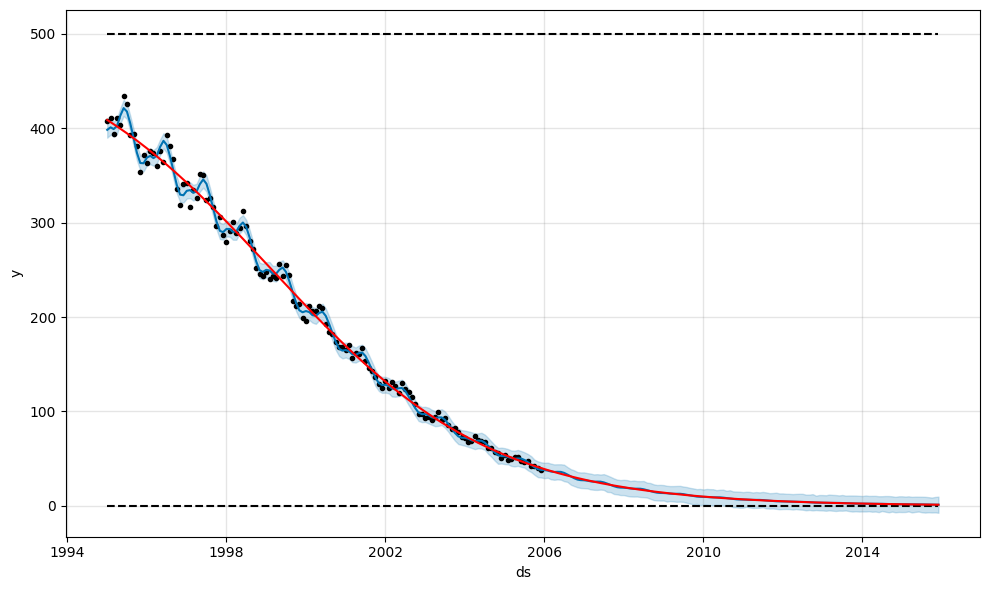

In [48]:
model = Prophet(growth='logistic',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
model.fit(df2)
future = model.make_future_dataframe(periods=12 * 10, freq='M')

## 'cap' , 'floor'
future['cap'] = 500
future['floor'] = 0

forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

In [51]:
forecast['yhat']

0      398.397768
1      401.037718
2      399.211257
3      402.483665
4      413.324910
          ...    
247      1.373747
248      1.289632
249      1.210418
250      1.147092
251      1.119711
Name: yhat, Length: 252, dtype: float64

## Applying flat growth

/tmp/ipykernel_6191/4060821431.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x = pd.to_datetime(pd.date_range('1995-01','2096-02', freq='M').strftime("%Y-%b").tolist())


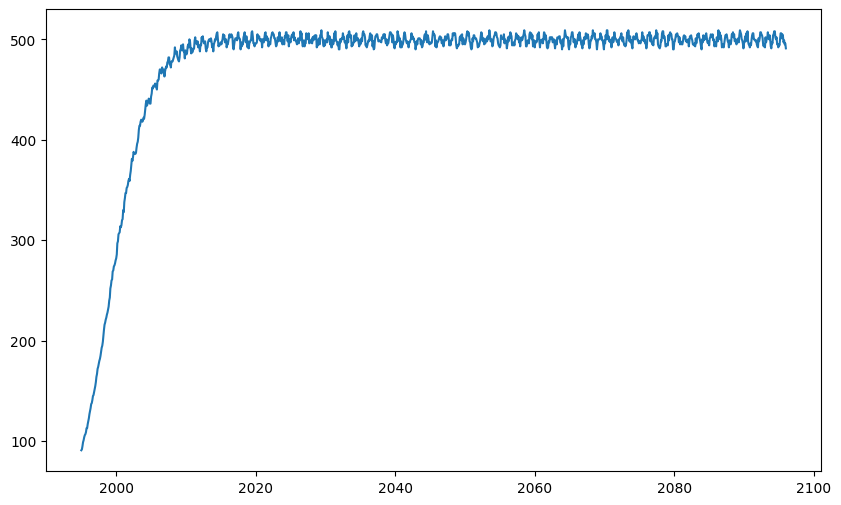

In [52]:
#  new dataset with longer timeframe

x = pd.to_datetime(pd.date_range('1995-01','2096-02', freq='M').strftime("%Y-%b").tolist())
y = [1 / (1 + np.e ** (-.03 * (val - 50))) for val in range(len(x))]  # create logistic curve
y = [y[idx] + y[idx] * .01 * np.sin((idx - 2) * (360 / 12) * (np.pi / 180)) for idx in range(len(y))]  # add sinusoidal variation
y = [val + 1 * val * random.uniform(-.01, .01) for val in y]  # add noise
y = [int(500 * val) for val in y]  # scale up
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()

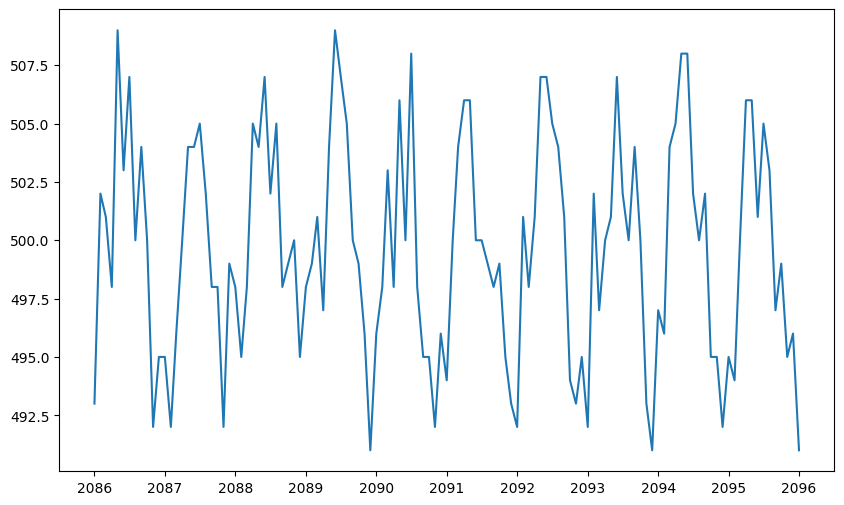

In [53]:
df = pd.DataFrame({'ds': pd.to_datetime(x), 'y': y})

## cut off at 2085 for training , saturated periods
df = df[df['ds'].dt.year > 2085]

plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'])
plt.show()

11:19:25 - cmdstanpy - INFO - Chain [1] start processing
11:19:25 - cmdstanpy - INFO - Chain [1] done processing


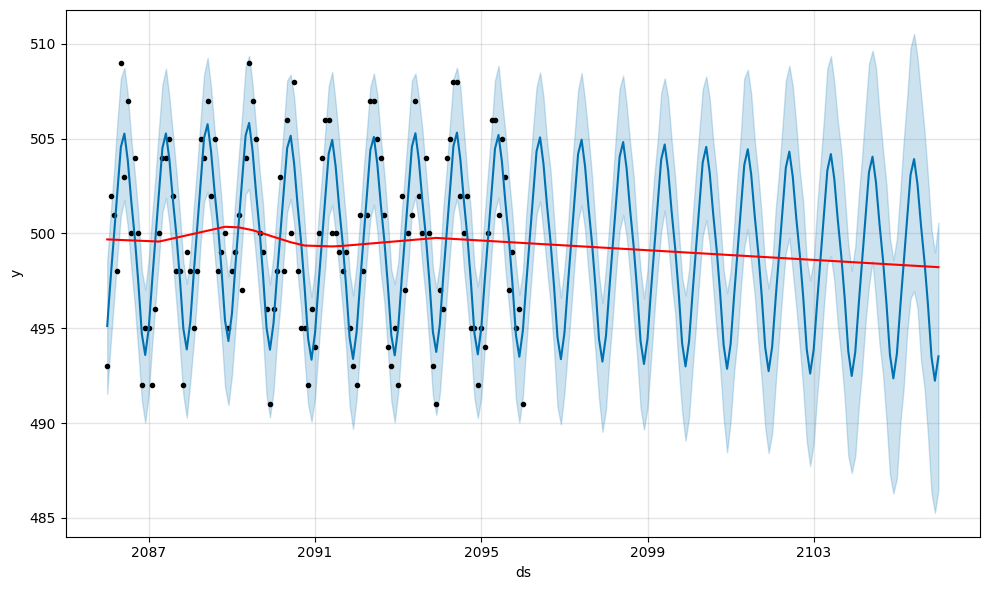

In [54]:
model = Prophet(growth='linear',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=12 * 10, freq='M')
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()


# Wrong result , trend exists due to noise

11:23:02 - cmdstanpy - INFO - Chain [1] start processing
11:23:02 - cmdstanpy - INFO - Chain [1] done processing


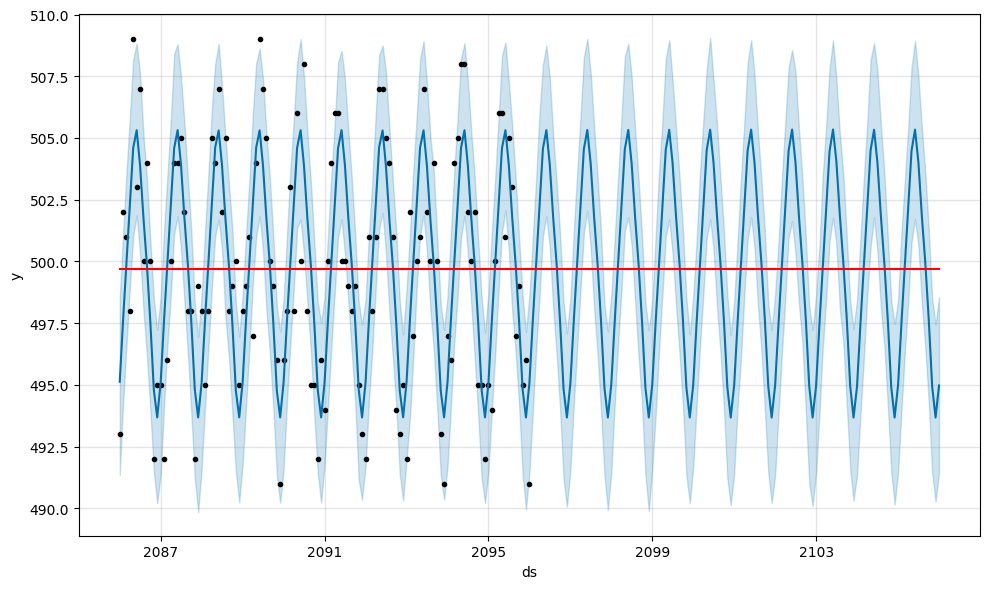

In [55]:
## Currect trend error , growth='flat'

model = Prophet(growth='flat',
                yearly_seasonality=3)
model.fit(df)
future = model.make_future_dataframe(periods=12 * 10, freq='M')
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()